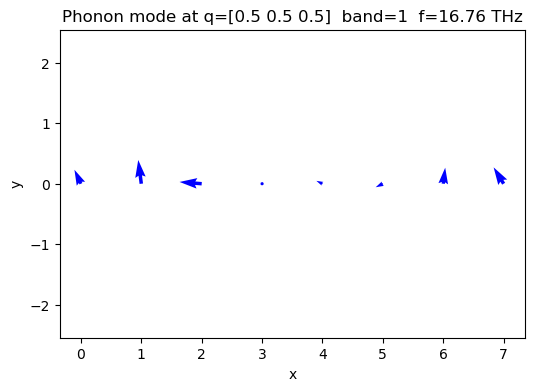

In [13]:
# -*- coding: utf-8 -*-
"""
Phonon mode visualizer from band.yaml (Phonopy output)

Usage (in IPython):
    disp, freqs, q_pos = read_and_extract("band.yaml", "POSCAR.vesta")
    plot_mode(disp, freqs, q_pos, q_index=0, band_index=0)

"""

import numpy as np
import yaml
import matplotlib.pyplot as plt
from pathlib import Path


def read_files(band_file="band.yaml", vesta_file="POSCAR.vesta"):
    """Read band.yaml and POSCAR.vesta files"""
    if not Path(band_file).exists() or not Path(vesta_file).exists():
        raise FileNotFoundError(f"Missing {band_file} or {vesta_file}")
    with open(band_file) as f:
        band_yaml = yaml.safe_load(f)
    with open(vesta_file) as f:
        vesta = f.read()
    return band_yaml, vesta


def extract(band_yaml):
    """
    Extract displacements and frequencies from band.yaml data

    Returns:
    --------
    displacements : np.ndarray [nq, nb, na, 3]
        Eigenvectors for each q-point, band, atom, and direction
    freqs : np.ndarray [nq, nb]
        Frequencies for each q-point and band
    q_pos : np.ndarray [nq, 3]
        q-point coordinates
    """
    nq = len(band_yaml["phonon"])
    nb = len(band_yaml["phonon"][0]["band"])
    na = len(band_yaml["phonon"][0]["band"][0]["eigenvector"])

    freqs = np.zeros((nq, nb))
    disp = np.zeros((nq, nb, na, 3))
    q_pos = []

    for iq, q in enumerate(band_yaml["phonon"]):
        q_pos.append(q["q-position"])
        for ib, b in enumerate(q["band"]):
            freqs[iq, ib] = b["frequency"]
            for ia, vec in enumerate(b["eigenvector"]):
                # each vec is [[real, imag], [real, imag], [real, imag]]
                disp[iq, ib, ia, :] = [float(v[0]) for v in vec]

    return disp, freqs, np.array(q_pos)


def plot_mode(displacements, freqs, q_pos, q_index=0, band_index=0):
    """
    Plot phonon mode vectors (2D projection) using matplotlib.quiver

    Parameters:
    -----------
    displacements : np.ndarray [nq, nb, na, 3]
    freqs : np.ndarray [nq, nb]
    q_pos : np.ndarray [nq, 3]
    q_index : int
        Which q-point to plot
    band_index : int
        Which phonon band to plot
    """
    mode = displacements[q_index, band_index, :, :]
    na = mode.shape[0]

    # Fake atom positions in a grid (since POSCAR parsing not implemented here)
    x = np.arange(na)
    y = np.zeros(na)

    plt.figure(figsize=(6, 4))
    plt.quiver(x, y, mode[:, 0], mode[:, 1], angles="xy", scale=1, scale_units="xy", color="blue")
    plt.title(f"Phonon mode at q={q_pos[q_index]}  band={band_index}  f={freqs[q_index, band_index]:.2f} THz")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.show()


# Example usage in IPython
if __name__ == "__main__":
    band_yaml, vesta = read_files("band.yaml", "POSCAR.vesta")
    displacements, freqs, q_pos = extract(band_yaml)
    plot_mode(displacements, freqs, q_pos, q_index=1, band_index=1)


In [ ]:
import os

# full path to your project
base_dir = r"c:\Users\Han-Hsuan\Documents\GitHub\Phonopy_VESTA\Si\phonon"

# go into band_yaml
os.chdir(os.path.join(base_dir, "band_yaml"))

c:\Users\Han-Hsuan\Documents\GitHub\Phonopy_VESTA\Si
c:\Users\Han-Hsuan\Documents\GitHub\Phonopy_VESTA\Si\phonon
